In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('train.csv' ,encoding ='cp949')
dataP = data.copy()


In [3]:

!pip install pandas_profiling
import pandas_profiling as pp

!pip install imblearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', palette='muted')
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      4055 non-null float64
겨울_구매건수      4103 non-null float64
봄_구매건수       4311 non-null float64
여름_구매건수      3978 non-null float64
아침_구매건수      3558 non-null float64
저녁_구매건수      4033 non-null float64
점심_구매건수      4855 non-null float64
주구매코너        5000 non-null object
dtypes: float64(10), int64(7), object(1)
memory usage: 703.2+ KB


In [5]:
data['주구매코너'].head(20)

0       화장품
1      영캐주얼
2       장신구
3       화장품
4       피혁A
5      영캐주얼
6     유니캐주얼
7       화장품
8       화장품
9       화장품
10      피혁A
11    유니캐주얼
12      화장품
13    유니캐주얼
14      화장품
15       섬유
16     영캐주얼
17      화장품
18      화장품
19     니트단품
Name: 주구매코너, dtype: object

In [6]:
dataP = data.copy()

In [7]:
col = dataP.columns
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [8]:
data['주구매코너'] = data['주구매코너'].astype('category')
data['주구매코너'] = data['주구매코너'].cat.codes
data['주구매코너'].value_counts()

14    1306
24    1206
12     410
13     383
9      301
11     246
19     188
8      136
7       96
21      91
3       91
16      90
10      78
22      75
15      68
23      56
5       51
6       38
17      28
1       18
2       12
4       11
18       8
0        7
20       6
Name: 주구매코너, dtype: int64

In [9]:
dataP=data.copy()

In [10]:
dataP.isnull().sum()

custid          0
gender          0
총구매액            0
구매건수            0
평균구매가격          0
평균할부개월수         0
구매브랜드종류         0
내점일수            0
수입상품_구매비율       0
주말방문비율          0
가을_구매건수       945
겨울_구매건수       897
봄_구매건수        689
여름_구매건수      1022
아침_구매건수      1442
저녁_구매건수       967
점심_구매건수       145
주구매코너           0
dtype: int64

In [11]:
dataP.shape

(5000, 18)

In [12]:
dataP_drop = dataP.dropna(subset=['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ])
dataP_drop.shape

(2235, 18)

In [13]:
dataP_drop.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [14]:
con = ['가을_구매건수','겨울_구매건수','봄_구매건수','여름_구매건수','아침_구매건수','저녁_구매건수','점심_구매건수' ]

In [15]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
imputer_con.fit(dataP[con])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [16]:
x = imputer_con.transform(dataP[con]); x

array([[ 1.,  9.,  6., ...,  1.,  6.,  9.],
       [ 1.,  5.,  4., ...,  3.,  1.,  6.],
       [ 7., 17., 12., ..., 10., 11., 15.],
       ...,
       [12.,  6.,  6., ..., 16.,  1., 21.],
       [ 6.,  4.,  2., ...,  1.,  2., 11.],
       [ 6.,  5., 10., ...,  8.,  5., 19.]])

In [17]:
dataP[con] = x
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [18]:
dataP[con].head()

,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수
0,1.0,9.0,6.0,1.0,1.0,6.0,9.0
1,1.0,5.0,4.0,1.0,3.0,1.0,6.0
2,7.0,17.0,12.0,1.0,10.0,11.0,15.0
3,5.0,8.0,15.0,1.0,1.0,18.0,10.0
4,1.0,1.0,5.0,1.0,1.0,5.0,2.0


In [19]:
dataP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
custid       5000 non-null int64
gender       5000 non-null int64
총구매액         5000 non-null int64
구매건수         5000 non-null int64
평균구매가격       5000 non-null int64
평균할부개월수      5000 non-null float64
구매브랜드종류      5000 non-null int64
내점일수         5000 non-null int64
수입상품_구매비율    5000 non-null float64
주말방문비율       5000 non-null float64
가을_구매건수      5000 non-null float64
겨울_구매건수      5000 non-null float64
봄_구매건수       5000 non-null float64
여름_구매건수      5000 non-null float64
아침_구매건수      5000 non-null float64
저녁_구매건수      5000 non-null float64
점심_구매건수      5000 non-null float64
주구매코너        5000 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 669.1 KB


In [20]:
dataP.isnull().sum()

custid       0
gender       0
총구매액         0
구매건수         0
평균구매가격       0
평균할부개월수      0
구매브랜드종류      0
내점일수         0
수입상품_구매비율    0
주말방문비율       0
가을_구매건수      0
겨울_구매건수      0
봄_구매건수       0
여름_구매건수      0
아침_구매건수      0
저녁_구매건수      0
점심_구매건수      0
주구매코너        0
dtype: int64

In [21]:
data0 = dataP[data.gender == 0 ]

In [22]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3479 entries, 0 to 4996
Data columns (total 18 columns):
custid       3479 non-null int64
gender       3479 non-null int64
총구매액         3479 non-null int64
구매건수         3479 non-null int64
평균구매가격       3479 non-null int64
평균할부개월수      3479 non-null float64
구매브랜드종류      3479 non-null int64
내점일수         3479 non-null int64
수입상품_구매비율    3479 non-null float64
주말방문비율       3479 non-null float64
가을_구매건수      3479 non-null float64
겨울_구매건수      3479 non-null float64
봄_구매건수       3479 non-null float64
여름_구매건수      3479 non-null float64
아침_구매건수      3479 non-null float64
저녁_구매건수      3479 non-null float64
점심_구매건수      3479 non-null float64
주구매코너        3479 non-null int8
dtypes: float64(10), int64(7), int8(1)
memory usage: 492.6 KB


In [23]:
data0.head(20)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,7.0,7.0,8.0,14.0,1.0,11.0,24.0,11
6,69,0,816300,14,58307,1.7,10,10,7.1,40.0,4.0,4.0,6.0,1.0,1.0,3.0,11.0,12
7,82,0,752200,5,150440,2.6,5,3,60.0,100.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,24
8,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,1.0,2.0,10.0,1.0,8.0,4.0,24
9,100,0,442160,16,27635,1.0,10,6,25.0,33.3,1.0,5.0,11.0,1.0,1.0,3.0,13.0,24


In [24]:
data1 = dataP[data.gender == 1]

In [25]:
data1.head()

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
158,1488,1,3762963,52,72365,2.0,26,27,0.0,63.0,15.0,18.0,7.0,12.0,8.0,8.0,36.0,11
169,1583,1,2093900,11,190355,5.9,7,4,27.3,0.0,8.0,1.0,3.0,1.0,1.0,3.0,8.0,1
203,2062,1,333000,3,111000,1.0,3,3,66.7,33.3,1.0,2.0,1.0,1.0,1.0,1.0,2.0,24
302,3028,1,2467700,13,189823,2.8,9,10,23.1,50.0,1.0,4.0,7.0,1.0,2.0,2.0,9.0,9
305,3053,1,4321420,21,205782,2.0,15,12,14.3,58.3,8.0,5.0,4.0,4.0,2.0,7.0,12.0,19


In [26]:
## 널값 날리고 / 남자 시트 data1 // 여자시트 data0 으로 구분 끝

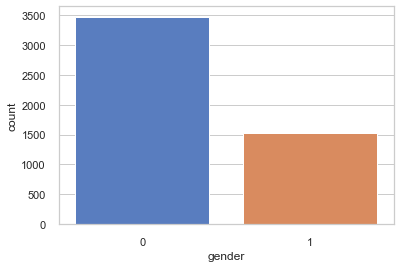

In [27]:
_ = sns.countplot(x = dataP.gender, y=None)

# 상관관계 확인 visualization

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
import scipy as sp
import seaborn as sns

In [30]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
# 남녀 모두 있는 데이터의 상관관계 확인

In [32]:
data.corr().gender.sort_values(ascending=False)

gender       1.000000
custid       0.262472
아침_구매건수      0.117025
총구매액         0.099137
점심_구매건수      0.098814
여름_구매건수      0.098237
구매건수         0.094022
내점일수         0.084255
구매브랜드종류      0.083988
가을_구매건수      0.082396
봄_구매건수       0.073478
평균구매가격       0.072181
겨울_구매건수      0.062853
주말방문비율       0.020457
저녁_구매건수     -0.017439
평균할부개월수     -0.020066
수입상품_구매비율   -0.021294
주구매코너       -0.039270
Name: gender, dtype: float64

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  fon

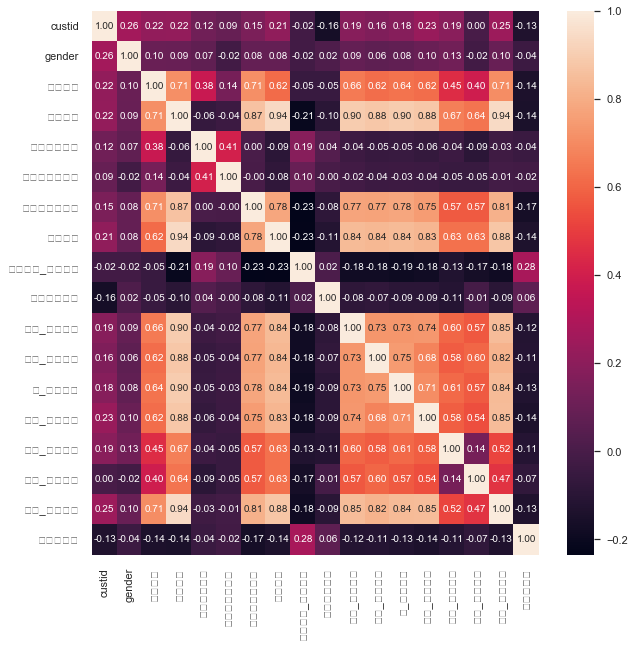

In [33]:
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns    

plt.figure(figsize=(10,10))
sns.heatmap(data = dataP.corr(), annot=True, 
fmt = '.2f')

In [34]:
# 암환자 데이터 응용해서 시각화

# del col 컬럼 여기있다

In [35]:
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [36]:
del_col = ['custid', 'gender', '평균할부개월수', '주말방문비율']

In [37]:
y = data.gender
x = data.drop(del_col, axis=1)

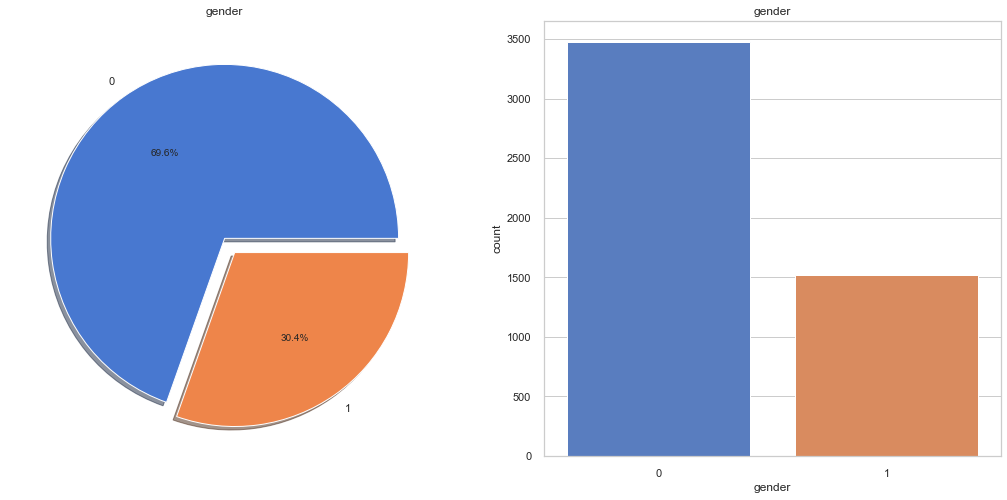

In [38]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('gender')
ax[0].set_ylabel('')
sns.countplot('gender',data=data,ax=ax[1])
ax[1].set_title('gender')
plt.show()


In [39]:
data.groupby(['gender','custid'])['gender'].count()

gender  custid
0       18        1
        21        1
        23        1
        26        1
        35        1
                 ..
1       49946     1
        49952     1
        49957     1
        49975     1
        49993     1
Name: gender, Length: 5000, dtype: int64

In [40]:
   # 두개가 상관관계 최하위라 그냥 빼봄
y = dataP.gender
x = dataP.drop(del_col, axis=1)
x

,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,수입상품_구매비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,680100,15,45340,9,10,26.7,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24
1,353450,9,39272,6,8,11.1,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11
2,5671400,36,157539,22,16,5.6,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15
3,1964000,28,70143,15,14,39.3,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24
4,885000,5,177000,5,2,0.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6666517,93,71683,27,39,10.8,13.0,33.0,14.0,33.0,8.0,41.0,44.0,14
4996,3112100,17,183065,10,13,29.4,4.0,6.0,6.0,1.0,3.0,1.0,14.0,5
4997,5852482,37,158175,14,21,40.5,12.0,6.0,6.0,13.0,16.0,1.0,21.0,24
4998,654498,13,50346,10,7,7.7,6.0,4.0,2.0,1.0,1.0,2.0,11.0,22


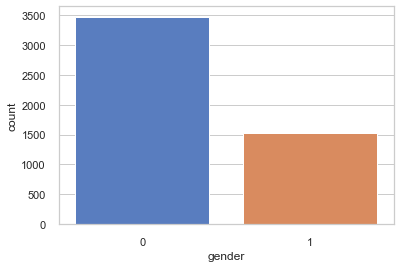

In [41]:
ax = sns.countplot(y, label='count')

In [42]:
x.describe()

,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,수입상품_구매비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
count,5.000000e+03,5000.000000,5000.0000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.360421e+06,34.538400,102564.0746,17.368800,18.054800,17.989860,8.437000,8.313000,9.253400,9.245600,6.464000,7.622400,20.991800,15.509000
std,5.088433e+06,40.109424,79091.0458,14.582432,19.369182,19.483598,10.805303,10.351467,11.394347,12.045161,11.291067,11.557514,26.303066,5.936242
min,-1.237971e+06,1.000000,-72822.0000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,7.223850e+05,10.000000,54811.0000,7.000000,6.000000,5.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,5.000000,12.000000
50%,1.806748e+06,21.000000,82201.5000,13.000000,12.000000,12.500000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,12.000000,14.000000
75%,4.030409e+06,44.000000,124142.7500,24.000000,23.000000,25.000000,11.000000,11.000000,12.000000,12.000000,7.000000,9.000000,27.000000,23.000000
max,9.286883e+07,491.000000,926117.0000,134.000000,249.000000,100.000000,130.000000,113.000000,128.000000,121.000000,174.000000,167.000000,366.000000,24.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D5AEE2CC48>,
      dtype=object)

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  fon

C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 45320 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47568 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47928 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\TJ\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 47568 missing from current font.
  font.se

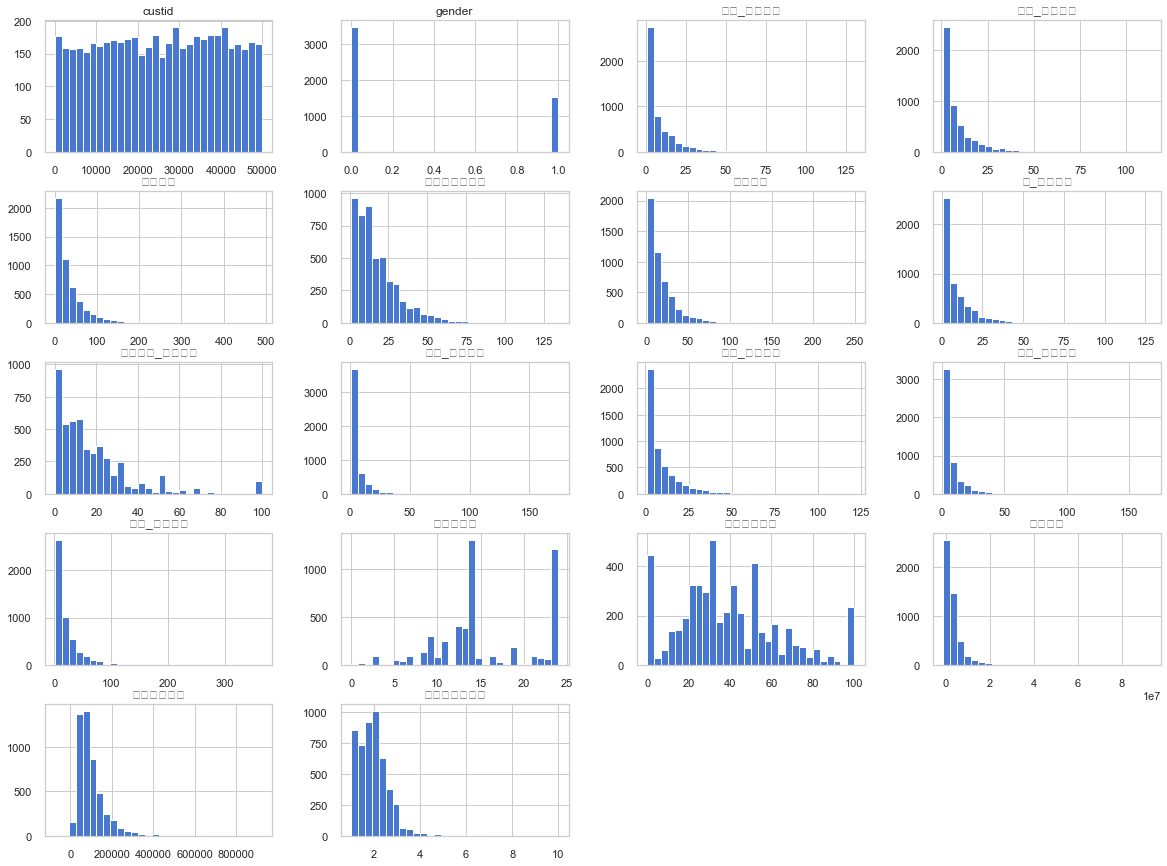

In [43]:
dataP.hist(bins=30, figsize=(20,15))

# Cross-Validation

In [44]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [45]:
dataP.head(30)

,custid,gender,총구매액,구매건수,평균구매가격,평균할부개월수,구매브랜드종류,내점일수,수입상품_구매비율,주말방문비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,18,0,680100,15,45340,1.7,9,10,26.7,100.0,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24
1,21,0,353450,9,39272,1.2,6,8,11.1,37.5,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11
2,23,0,5671400,36,157539,2.8,22,16,5.6,37.5,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15
3,26,0,1964000,28,70143,1.4,15,14,39.3,28.6,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24
4,35,0,885000,5,177000,6.0,5,2,0.0,100.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22
5,50,0,3580200,36,99450,2.4,27,20,0.0,50.0,7.0,7.0,8.0,14.0,1.0,11.0,24.0,11
6,69,0,816300,14,58307,1.7,10,10,7.1,40.0,4.0,4.0,6.0,1.0,1.0,3.0,11.0,12
7,82,0,752200,5,150440,2.6,5,3,60.0,100.0,1.0,1.0,5.0,1.0,1.0,1.0,5.0,24
8,92,0,1145400,13,88108,1.9,7,9,23.1,22.2,1.0,1.0,2.0,10.0,1.0,8.0,4.0,24
9,100,0,442160,16,27635,1.0,10,6,25.0,33.3,1.0,5.0,11.0,1.0,1.0,3.0,13.0,24


In [46]:
dfX = dataP.drop(del_col, axis=1) 

In [47]:
dfy = dataP['gender']

In [48]:
dataP['gender'].value_counts()

0    3479
1    1521
Name: gender, dtype: int64

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#model = KNeighborsClassifier()
model = LogisticRegression()
#model = DecisionTreeClassifier()

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [51]:
scores = cross_val_score(model, dfX, dfy); scores

array([0.696, 0.697, 0.695, 0.697, 0.695])

In [52]:
#### mean  / Std / Min / MAX 순이다

In [53]:
from sklearn.model_selection import train_test_split 

dfX = dataP.drop(del_col, axis=1)
dfy = dataP['gender']

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size = 0.25, random_state = 0)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


In [55]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test, y_pred)

0.7048

In [56]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [57]:
# import the SMOTETomek.
from imblearn.combine import SMOTETomek

# create the  object with the desired sampling strategy.
smotemek = SMOTETomek(sampling_strategy='auto')

# fit the object to our training data.
X_train_smt, y_train_smt = smotemek.fit_sample(X_train, y_train)

Using TensorFlow backend.


In [58]:
# 정제하고 돌려보기

In [59]:
col

Index(['custid', 'gender', '총구매액', '구매건수', '평균구매가격', '평균할부개월수', '구매브랜드종류',
       '내점일수', '수입상품_구매비율', '주말방문비율', '가을_구매건수', '겨울_구매건수', '봄_구매건수',
       '여름_구매건수', '아침_구매건수', '저녁_구매건수', '점심_구매건수', '주구매코너'],
      dtype='object')

In [60]:
dfX

,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,수입상품_구매비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
0,680100,15,45340,9,10,26.7,1.0,9.0,6.0,1.0,1.0,6.0,9.0,24
1,353450,9,39272,6,8,11.1,1.0,5.0,4.0,1.0,3.0,1.0,6.0,11
2,5671400,36,157539,22,16,5.6,7.0,17.0,12.0,1.0,10.0,11.0,15.0,15
3,1964000,28,70143,15,14,39.3,5.0,8.0,15.0,1.0,1.0,18.0,10.0,24
4,885000,5,177000,5,2,0.0,1.0,1.0,5.0,1.0,1.0,5.0,2.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6666517,93,71683,27,39,10.8,13.0,33.0,14.0,33.0,8.0,41.0,44.0,14
4996,3112100,17,183065,10,13,29.4,4.0,6.0,6.0,1.0,3.0,1.0,14.0,5
4997,5852482,37,158175,14,21,40.5,12.0,6.0,6.0,13.0,16.0,1.0,21.0,24
4998,654498,13,50346,10,7,7.7,6.0,4.0,2.0,1.0,1.0,2.0,11.0,22


In [61]:
display(X_train.shape, X_test.shape)
X_train.head()

(3750, 14)

(1250, 14)

,총구매액,구매건수,평균구매가격,구매브랜드종류,내점일수,수입상품_구매비율,가을_구매건수,겨울_구매건수,봄_구매건수,여름_구매건수,아침_구매건수,저녁_구매건수,점심_구매건수,주구매코너
4154,404285,3,134762,3,2,33.3,1.0,1.0,2.0,1.0,1.0,1.0,2.0,22
4820,6169420,38,162353,29,26,13.2,8.0,13.0,7.0,10.0,13.0,1.0,25.0,10
1202,2407157,32,75224,22,17,9.4,3.0,3.0,6.0,20.0,3.0,8.0,21.0,14
3759,4664283,78,59798,24,22,1.3,17.0,12.0,29.0,20.0,1.0,23.0,55.0,14
622,3299200,11,299927,9,3,45.5,1.0,1.0,11.0,1.0,1.0,1.0,11.0,16


In [62]:
# 트리 탐색
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=6, random_state=0)

tree.fit(X_train_smt, y_train_smt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [63]:
pred_tree = tree.predict(X_test); pred_tree

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [64]:
# 트리 확률
display(tree.score(X_train_smt, y_train_smt))
display(tree.score(X_test, y_test))

0.7061784897025172

0.5512

In [65]:
# SVM 탐색
from sklearn.svm import SVC 
svm = SVC(random_state=0)
svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [66]:
# SVM 확률
display(svm.score(X_train_smt, y_train_smt))
display(svm.score(X_test, y_test))

0.5036613272311213

0.7072

In [80]:
# 신경망 탐색
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier()
mlp.fit(X_train_smt, y_train_smt)

C:\Users\TJ\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [69]:
# 신경망 확률
display(mlp.score(X_train_smt, y_train_smt))
display(mlp.score(X_test, y_test))

0.5004576659038902

0.7064

In [70]:
# 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier

r_forest = RandomForestClassifier()
r_forest.fit(X_train_smt, y_train_smt)




RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
display(r_forest.score(X_train_smt, y_train_smt))
display(r_forest.score(X_test, y_test))

0.9988558352402745

0.6256

In [72]:
# 그라디언트 부스팅
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier()
g_boost.fit(X_train_smt, y_train_smt)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [73]:
display(g_boost.score(X_train_smt, y_train_smt))
display(g_boost.score(X_test, y_test))

0.794279176201373

0.6264

In [74]:
from sklearn.ensemble import GradientBoostingClassifier

g_boost2 = GradientBoostingClassifier(learning_rate=0.001)
g_boost2.fit(X_train, y_train)

display(g_boost2.score(X_train_smt, y_train_smt))
display(g_boost2.score(X_test, y_test))

0.5

0.7064

In [79]:
from imblearn.under_sampling import NearMiss

# create the object with auto
near = NearMiss(sampling_strategy="not minority")

# fit the object to the training data.
x_train_near, y_train_near = near.fit_sample(X_train_smt, y_train_smt)